steps involved:

1 Reading data and understanding it.

2 cleaning the data

3 preparing the data

4 modeling the data

5 analyzing and recomending

# Step 1: Reading the data and understanding it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\user\Downloads\Online+Retail (1).csv',encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Step 2 : Cleaning the data 

In [6]:
# checking for % of missing values ( if more then 10% of the values are missing we should ignore the column but as CustomerID is one of the most important column we cant drop it)
round(100*(df.isnull().sum()/len(df)),2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [7]:
# we have to drop rows with missing values
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [8]:
for i in df.columns:
    print(df[i].value_counts())

576339     542
579196     533
580727     529
578270     442
573576     435
          ... 
539646       1
571237       1
C542262      1
570554       1
C544425      1
Name: InvoiceNo, Length: 22190, dtype: int64
85123A    2077
22423     1905
85099B    1662
84879     1418
47566     1416
          ... 
37503        1
90038A       1
90100        1
84856S       1
90024F       1
Name: StockCode, Length: 3684, dtype: int64
WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
                                      ... 
DIAMANTE NECKLACE BLACK                  1
ASSORTED COLOUR SILK GLASSES CASE        1
DOORKNOB CERAMIC IVORY                   1
PINK POLKADOT KIDS BAG                   1
POTTING SHED SOW 'N' GROW SET            1
Name: Description, Length: 3896, dtype: int64
 1      73314
 12     60033
 2      58003
 6      37688
 4    

# Step 3 : Preparing data for modeling 

In [9]:
#-F - frequency
#-R - recency
#-m - monetary
# so our final df must have cust_id , freq, recency, monatary columns


In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [11]:
df['amount']=df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [12]:
monetary=df.groupby('CustomerID')['amount'].sum()
monetary=monetary.reset_index()
monetary.head()

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [13]:
freq=df.groupby('CustomerID')['InvoiceNo'].count()
freq=freq.reset_index()
freq.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [14]:
df1=pd.merge(monetary,freq,on='CustomerID',how='inner')
df1.head()

,CustomerID,amount,InvoiceNo
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [15]:
df1.columns=['CustomerID','Monetary','Frequency']
df1.head()

,CustomerID,Monetary,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [16]:
# making recency column
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [17]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [18]:
max_date=max(df['InvoiceDate'])

In [19]:
max_date

Timestamp('2011-12-09 12:50:00')

In [20]:
df['diff']=max_date-df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [21]:
recency=df.groupby('CustomerID')['diff'].min()
recency=recency.reset_index()
recency.head()

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [22]:
df1=pd.merge(df1,recency,on='CustomerID',how='inner')
df1.head()

,CustomerID,Monetary,Frequency,diff
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [23]:
df1.columns=['CustomerID','Monetary','Frequency','recency']
df1.head()
df1.shape

(4372, 4)

In [24]:
# convert df1 recency column to only nos:
import datetime as dt
df1['recency']=df1['recency'].dt.days
df1.head()

,CustomerID,Monetary,Frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [25]:
# handling outliers
# monetary column
q1=df1['Monetary'].quantile(0.05)
q2=df1['Monetary'].quantile(0.95)
iqr=q2-q1
df1=df1[(df1['Monetary']>=q1-(1.5*iqr)) & (df1['Monetary']<=q2+(1.5*iqr))]

In [26]:
# recency column
q1=df1['recency'].quantile(0.05)
q2=df1['recency'].quantile(0.95)
iqr=q2-q1
df1=df1[(df1['recency']>=q1-(1.5*iqr)) & (df1['recency']<=q2+(1.5*iqr))]

In [27]:
# frequency column
q1=df1['Frequency'].quantile(0.05)
q2=df1['Frequency'].quantile(0.95)
iqr=q2-q1
df1=df1[(df1['Frequency']>=q1-(1.5*iqr)) & (df1['Frequency']<=q2+(1.5*iqr))]

In [28]:
df1.shape

(4293, 4)

{'whiskers': [<matplotlib.lines.Line2D at 0x2492c8bb9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2492c8d20a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2492c8bb640>],
 'medians': [<matplotlib.lines.Line2D at 0x2492c8d2760>],
 'fliers': [<matplotlib.lines.Line2D at 0x2492c8d2a60>],
 'means': []}

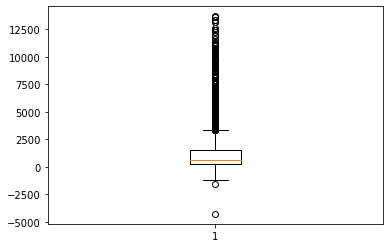

In [29]:
# watching outliers 
plt.boxplot(df1['Monetary'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2492d81a0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2492d81a790>,
 'boxes': [<matplotlib.lines.Line2D at 0x2492d80ad30>],
 'medians': [<matplotlib.lines.Line2D at 0x2492d81ae80>],
 'fliers': [<matplotlib.lines.Line2D at 0x2492d8241c0>],
 'means': []}

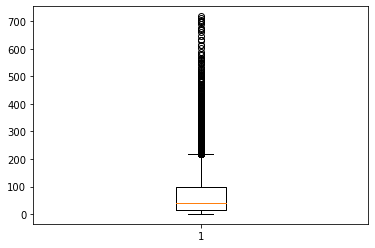

In [30]:
plt.boxplot(df1['Frequency'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2492d878730>,
 'caps': [<matplotlib.lines.Line2D at 0x2492d878df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2492d8783d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2492d8854f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2492d8857f0>],
 'means': []}

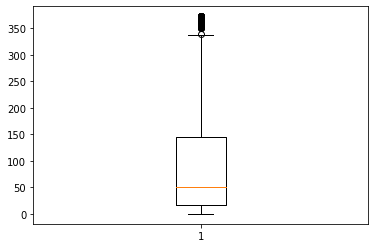

In [31]:
plt.boxplot(df1['recency'])

In [32]:
# rescaling
import sklearn
from sklearn.preprocessing import StandardScaler

In [33]:
rfm=df1[['Monetary','Frequency','recency']]
rfm.head()

,Monetary,Frequency,recency
0,0.00,2,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309


In [34]:
scaler=StandardScaler()
rfm_scaler=scaler.fit_transform(rfm)
rfm_scaler

array([[-0.72373821, -0.75288754,  2.30161144],
       [ 1.73161722,  1.04246665, -0.90646561],
       [ 0.30012791, -0.46363604, -0.18365813],
       ...,
       [-0.67769602, -0.70301659,  0.86589794],
       [-0.6231313 , -0.64317145, -0.84705678],
       [ 0.32293822, -0.07464263, -0.50050524]])

In [35]:
rfm_df=pd.DataFrame(rfm_scaler)
rfm_df.columns=['Monetary','Frequency','recency']
rfm_df.head()

,Monetary,Frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


# Hopkins test

In [36]:
# Check the hopkins

#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [37]:
l= []
for i in range(10):
    l.append(hopkins(rfm_df))

sum(l)*100/len(l)

95.55845354446458

In [38]:
# any value above 70% is good and signifies that data is clusterable

# Step 4 : Modeling

In [39]:
from sklearn.cluster import KMeans
kmean=KMeans(n_clusters=4,max_iter=50)
kmean.fit(rfm_df)

KMeans(max_iter=50, n_clusters=4)

In [40]:
kmean.labels_

array([3, 0, 1, ..., 3, 1, 1])

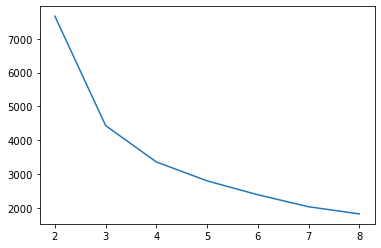

In [41]:
# Elbow curve method
ssn=[]
num=[2,3,4,5,6,7,8]
for i in num:
    kmean=KMeans(n_clusters=i,max_iter=50)
    kmean.fit(rfm_df)
    ssn.append(kmean.inertia_)
plt.plot(ssn) 
plt.xticks(ticks=[0,1,2,3,4,5,6],labels=[2,3,4,5,6,7,8])
plt.show()

In [42]:
# 3 no of clusters is good because there we get a huge transition 


In [43]:
# sihoutte score analysis

In [44]:
from sklearn.metrics import silhouette_score
num=[2,3,4,5,6,7,8]
for i in num:
    kmean=KMeans(n_clusters=i,max_iter=50)
    kmean.fit(rfm_df)
    labels=kmean.labels_
    silh_score=silhouette_score(rfm_df,labels)
    print('for n_cluster={0} silhouette_score={1}'.format(i,silh_score))
    

for n_cluster=2 silhouette_score=0.541842117113117
for n_cluster=3 silhouette_score=0.5084896296141937
for n_cluster=4 silhouette_score=0.477782010021685
for n_cluster=5 silhouette_score=0.4662700564189704
for n_cluster=6 silhouette_score=0.4176374700344281
for n_cluster=7 silhouette_score=0.4175902212088545
for n_cluster=8 silhouette_score=0.40958630945020674


In [45]:
# from business point of view silhouette analysis and elbow curve analysis we can conclude that n_cluster=3 is the best

In [46]:
kmean=KMeans(n_clusters=3,max_iter=50)
kmean.fit(rfm_df)
labels=kmean.labels_

In [47]:
df1['cust_label']=kmean.labels_
df1.head()

,CustomerID,Monetary,Frequency,recency,cust_label
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2


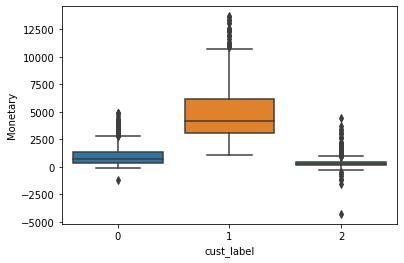

In [48]:
sns.boxplot(x='cust_label',y='Monetary',data=df1)

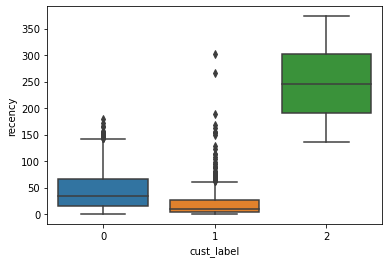

In [49]:
sns.boxplot(x='cust_label',y='recency',data=df1)

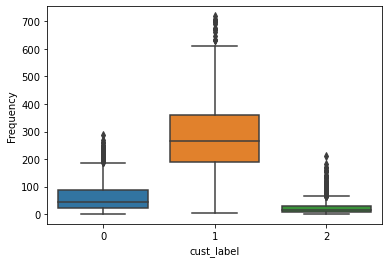

In [50]:
sns.boxplot(x='cust_label',y='Frequency',data=df1)

# heirarchical clustring 

In [51]:
df1.head()

,CustomerID,Monetary,Frequency,recency,cust_label
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2


In [52]:
rfm_df.head()

,Monetary,Frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [53]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

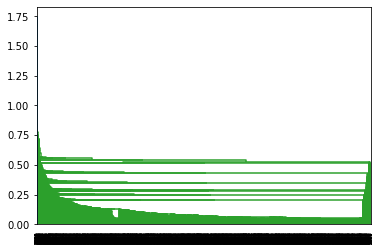

In [54]:
merging=linkage(rfm_df,method='single',metric='euclidean')
dendrogram(merging)
plt.show()

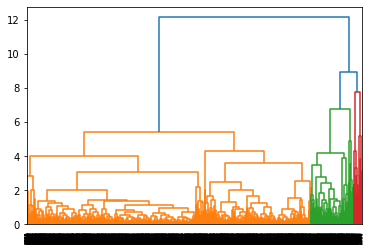

In [55]:
merging=linkage(rfm_df,method='complete',metric='euclidean')
dendrogram(merging)
plt.show()

In [62]:
h_labels=cut_tree(merging,n_clusters=3).reshape(-1,)
h_labels

array([0, 1, 0, ..., 0, 0, 0])

In [57]:
df1['h_labels']=h_labels

In [58]:
df1.head()

,CustomerID,Monetary,Frequency,recency,cust_label,h_labels
0,12346.0,0.00,2,325,2,0
1,12347.0,4310.00,182,1,1,1
2,12348.0,1797.24,31,74,0,0
3,12349.0,1757.55,73,18,0,0
4,12350.0,334.40,17,309,2,0


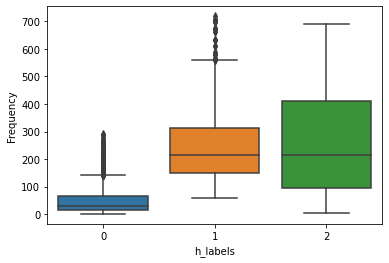

In [59]:
sns.boxplot(x='h_labels',y='Frequency',data=df1)

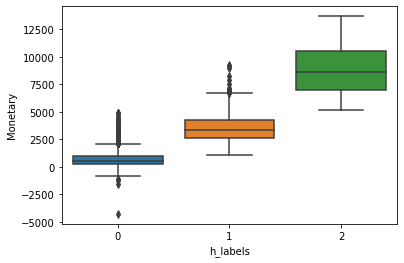

In [60]:
sns.boxplot(x='h_labels',y='Monetary',data=df1)

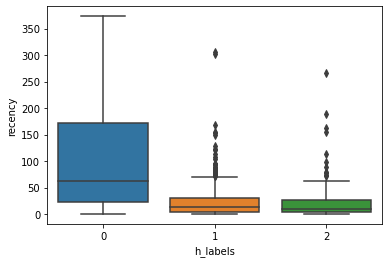

In [61]:
sns.boxplot(x='h_labels',y='recency',data=df1)